# UTS

## 1.	Lakukan analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM 

## Preprocessing Berita

In [1]:
import pandas as pd

# Load data from berita_cnn.csv
df = pd.read_csv('Berita.csv')

In [2]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
df

Dataset shape: (1500, 6)


,No,judul,berita,tanggal,kategori,link
0,1,Airlangga Harap Kenaikan UMP Tingkatkan Daya B...,Menteri Koordinator (Menko) Bidang Perekonomia...,"Minggu, 01 Des 2024 23:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
1,2,PT SIER Beri Penghargaan untuk 50 Tenant Terba...,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","Minggu, 01 Des 2024 20:45 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412012...
2,3,Prabowo Bakal Bentuk Kementerian Penerimaan Ne...,Wacana Presiden Prabowo Subianto akan membentu...,"Minggu, 01 Des 2024 19:40 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
3,4,Sinergi Kemenag & BPJS Ketenagakerjaan Lindung...,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"Minggu, 01 Des 2024 19:03 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
4,5,Pemerintah Segera Bentuk Satgas PHK Usai Tetap...,Pemerintah akan segera membentuk Satuan Tugas ...,"Minggu, 01 Des 2024 19:00 WIB",Ekonomi,https://www.cnnindonesia.com/ekonomi/202412011...
...,...,...,...,...,...,...
1495,1496,Laporan Sebab Tabrakan Pesawat-Black Hawk Dita...,Anggota Dewan Keselamatan Transportasi Nasiona...,"Jumat, 31 Jan 2025 04:40 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1496,1497,"Israel Bebaskan 110 Sandera Palestina, Diantar...",Israel telah membebaskan 110 tahanan Palestina...,"Jumat, 31 Jan 2025 03:01 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1497,1498,Hamas Konfirmasi Kematian Komandan Al Qassam M...,Hamas mengonfirmasi kematian kepala militernya...,"Jumat, 31 Jan 2025 02:30 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...
1498,1499,Black Box American Airlines Ditemukan Usai Tab...,Tim penyelam diduga menemukan satu dari dua bl...,"Jumat, 31 Jan 2025 01:00 WIB",Internasional,https://www.cnnindonesia.com/internasional/202...


In [3]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        1500 non-null   int64 
 1   judul     1500 non-null   object
 2   berita    1500 non-null   object
 3   tanggal   1500 non-null   object
 4   kategori  1500 non-null   object
 5   link      1500 non-null   object
dtypes: int64(1), object(5)
memory usage: 70.4+ KB


##   PREPROCESSING

In [4]:
# Tampilkan data "isi"
df['berita']

0       Menteri Koordinator (Menko) Bidang Perekonomia...
1       Dalam rangka memeriahkan hari jadi ke-50, PT S...
2       Wacana Presiden Prabowo Subianto akan membentu...
3       BPJS Ketenagakerjaan dan Kementerian Agama (Ke...
4       Pemerintah akan segera membentuk Satuan Tugas ...
                              ...                        
1495    Anggota Dewan Keselamatan Transportasi Nasiona...
1496    Israel telah membebaskan 110 tahanan Palestina...
1497    Hamas mengonfirmasi kematian kepala militernya...
1498    Tim penyelam diduga menemukan satu dari dua bl...
1499    Presiden AS Donald Trump menyalahkan pemerinta...
Name: berita, Length: 1500, dtype: object

## Hapus Missing Value dan Data Duplicat

In [5]:
# Hapus baris dengan Missing Value di 'berita'
df.dropna(subset=['berita'], inplace=True)

# Hapus data duplikat
df.drop_duplicates(inplace=True)

## Text Cleaning

In [6]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Pastikan input adalah string
    if not isinstance(text, str):
        return ""
        
    text = text.lower() # 1. Ubah ke huruf kecil
    
    # Ganti karakter non-breaking space (U+00A0) dengan spasi biasa
    text = text.replace(u'\xa0', u' ')
    
    # Hapus semua karakter yang BUKAN huruf, angka, atau spasi
    text = re.sub(r'[^\w\s]', '', text)
    
    # Hapus semua angka
    text = re.sub(r'\d+', '', text)
    
    # Ganti spasi ganda/lebih menjadi satu spasi & hapus spasi di awal/akhir
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Terapkan pembersihan ke kolom 'isi'
df['cleaned_isi'] = df['berita'].apply(clean_text)

# Tampilkan DataFrame
display(df[['berita', 'cleaned_isi']].head())

,berita,cleaned_isi
0,Menteri Koordinator (Menko) Bidang Perekonomia...,menteri koordinator menko bidang perekonomian ...
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...",dalam rangka memeriahkan hari jadi ke pt surab...
2,Wacana Presiden Prabowo Subianto akan membentu...,wacana presiden prabowo subianto akan membentu...
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,bpjs ketenagakerjaan dan kementerian agama kem...
4,Pemerintah akan segera membentuk Satuan Tugas ...,pemerintah akan segera membentuk satuan tugas ...


## Tokenisasi

In [7]:
import sys

# Perintah untuk menginstal library menggunakan path Python yang sedang aktif
!{sys.executable} -m pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\laragon\bin\python\python-3.10\python.exe -m pip install --upgrade pip


In [8]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 

# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi ke kolom 'cleaned_isi'
df['tokenized_isi'] = df['cleaned_isi'].apply(tokenize_text)

# Tampilkan DataFrame dengan kolom hasil tokenisasi
display(df[['cleaned_isi', 'tokenized_isi']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,cleaned_isi,tokenized_isi
0,menteri koordinator menko bidang perekonomian ...,"[menteri, koordinator, menko, bidang, perekono..."
1,dalam rangka memeriahkan hari jadi ke pt surab...,"[dalam, rangka, memeriahkan, hari, jadi, ke, p..."
2,wacana presiden prabowo subianto akan membentu...,"[wacana, presiden, prabowo, subianto, akan, me..."
3,bpjs ketenagakerjaan dan kementerian agama kem...,"[bpjs, ketenagakerjaan, dan, kementerian, agam..."
4,pemerintah akan segera membentuk satuan tugas ...,"[pemerintah, akan, segera, membentuk, satuan, ..."


## Stopword Removal

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Dapatkan Stop Word bahasa Indonesia
list_stopwords = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

# Terapkan penghapusan Stop Word ke kolom 'tokenized_isi'
df['stopwords_removed_isi'] = df['tokenized_isi'].apply(remove_stopwords)

# Tampilkan DataFrame
display(df[['tokenized_isi', 'stopwords_removed_isi']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokenized_isi,stopwords_removed_isi
0,"[menteri, koordinator, menko, bidang, perekono...","[menteri, koordinator, menko, bidang, perekono..."
1,"[dalam, rangka, memeriahkan, hari, jadi, ke, p...","[rangka, memeriahkan, pt, surabaya, industrial..."
2,"[wacana, presiden, prabowo, subianto, akan, me...","[wacana, presiden, prabowo, subianto, membentu..."
3,"[bpjs, ketenagakerjaan, dan, kementerian, agam...","[bpjs, ketenagakerjaan, kementerian, agama, ke..."
4,"[pemerintah, akan, segera, membentuk, satuan, ...","[pemerintah, membentuk, satuan, tugas, pemutus..."


In [10]:
from collections import Counter

# Gabungkan semua token setelah stopword removal menjadi satu daftar
all_words_after_stopwords = [word for tokens in df['stopwords_removed_isi'] for word in tokens]

# Hitung frekuensi setiap kata
word_frequencies = Counter(all_words_after_stopwords)

# Menampilkan kata-kata yang paling umum dan frekuensinya
print("Top Most Frequent Words (Without Stemming):")
for word, frequency in word_frequencies.most_common(20): # Menampilkan 20 kata teratas
    print(f"{word}: {frequency}")

Top Most Frequent Words (Without Stemming):
indonesia: 2312
cnn: 1249
laut: 1109
presiden: 1041
rp: 1021
orang: 926
negara: 918
israel: 907
timnas: 891
persen: 883
pagar: 852
menteri: 820
pemerintah: 813
jakarta: 809
pemain: 791
piala: 753
warga: 701
prabowo: 690
tim: 682
gambasvideo: 670


In [11]:
# Buat DataFrame baru dengan isi berita asli, hasil preprocessing, dan kategori
processed_df = df[['berita', 'stopwords_removed_isi', 'kategori']].copy()

# Ganti nama kolom 'stopwords_removed_isi' menjadi 'hasil_preprocessing'
processed_df.rename(columns={'stopwords_removed_isi': 'hasil_preprocessing'}, inplace=True)

# Konversi frekuensi kata ke DataFrame
frequency_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
frequency_df.index.name = 'word'
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)

# Simpan ke dua file CSV terpisah
processed_df.to_csv('hasil_preprocessing_beritaUTS.csv', index=False, encoding='utf-8')
frequency_df.to_csv('frekuensi_kata_beritaUTS.csv', encoding='utf-8')

print("Hasil preprocessing disimpan di 'hasil_preprocessing_beritaUTS.csv'")
print("Frekuensi kata disimpan di 'frekuensi_kata_beritaUTS.csv'")

Hasil preprocessing disimpan di 'hasil_preprocessing_beritaUTS.csv'
Frekuensi kata disimpan di 'frekuensi_kata_beritaUTS.csv'


In [12]:
hasil_preprocessing = "hasil_preprocessing_beritaUTS.csv"  
df = pd.read_csv(hasil_preprocessing)

# Tampilkan data
df

,berita,hasil_preprocessing,kategori
0,Menteri Koordinator (Menko) Bidang Perekonomia...,"['menteri', 'koordinator', 'menko', 'bidang', ...",Ekonomi
1,"Dalam rangka memeriahkan hari jadi ke-50, PT S...","['rangka', 'memeriahkan', 'pt', 'surabaya', 'i...",Ekonomi
2,Wacana Presiden Prabowo Subianto akan membentu...,"['wacana', 'presiden', 'prabowo', 'subianto', ...",Ekonomi
3,BPJS Ketenagakerjaan dan Kementerian Agama (Ke...,"['bpjs', 'ketenagakerjaan', 'kementerian', 'ag...",Ekonomi
4,Pemerintah akan segera membentuk Satuan Tugas ...,"['pemerintah', 'membentuk', 'satuan', 'tugas',...",Ekonomi
...,...,...,...
1495,Anggota Dewan Keselamatan Transportasi Nasiona...,"['anggota', 'dewan', 'keselamatan', 'transport...",Internasional
1496,Israel telah membebaskan 110 tahanan Palestina...,"['israel', 'membebaskan', 'tahanan', 'palestin...",Internasional
1497,Hamas mengonfirmasi kematian kepala militernya...,"['hamas', 'mengonfirmasi', 'kematian', 'kepala...",Internasional
1498,Tim penyelam diduga menemukan satu dari dua bl...,"['tim', 'penyelam', 'diduga', 'menemukan', 'bl...",Internasional


In [13]:
frekuensi_kata = "frekuensi_kata_beritaUTS.csv"  
df = pd.read_csv(frekuensi_kata)

# Tampilkan data
df

,word,frequency
0,indonesia,2312
1,cnn,1249
2,laut,1109
3,presiden,1041
4,rp,1021
...,...,...
37076,tersangkadalam,1
37077,satres,1
37078,tanahsementara,1
37079,tradisionalkkp,1


## Analisa klasifikasikan berita dengan extraksi fitur model topik modelling dengan classifier naïve bayes dan SVM 

In [14]:
## SETUP

# Import library dasar
import pandas as pd
import numpy as np
import time

# Import untuk LDA & Koherensi
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, HdpModel

# Import untuk Klasifikasi & Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Import untuk Visualisasi
import matplotlib.pyplot as plt


print("Semua library berhasil diimpor.")



Semua library berhasil diimpor.


In [15]:
# Memuat Dataset 
try:
    df = pd.read_csv('hasil_preprocessing_beritaUTS.csv')
    print(f"\nDataset berhasil dimuat. Jumlah data: {len(df)} baris.")
    print("Contoh data awal:")
    print(df.head())
except FileNotFoundError:
    print("\nError: File tidak ditemukan. Pastikan nama file CSV sudah benar.")
    # Jika file tidak ditemukan, hentikan proses.
    # df = pd.DataFrame()


Dataset berhasil dimuat. Jumlah data: 1500 baris.
Contoh data awal:
                                              berita  \
0  Menteri Koordinator (Menko) Bidang Perekonomia...   
1  Dalam rangka memeriahkan hari jadi ke-50, PT S...   
2  Wacana Presiden Prabowo Subianto akan membentu...   
3  BPJS Ketenagakerjaan dan Kementerian Agama (Ke...   
4  Pemerintah akan segera membentuk Satuan Tugas ...   

                                 hasil_preprocessing kategori  
0  ['menteri', 'koordinator', 'menko', 'bidang', ...  Ekonomi  
1  ['rangka', 'memeriahkan', 'pt', 'surabaya', 'i...  Ekonomi  
2  ['wacana', 'presiden', 'prabowo', 'subianto', ...  Ekonomi  
3  ['bpjs', 'ketenagakerjaan', 'kementerian', 'ag...  Ekonomi  
4  ['pemerintah', 'membentuk', 'satuan', 'tugas',...  Ekonomi  


In [16]:
## EKSTRAKSI FITUR LDA & PENCARIAN TOPIK OPTIMAL

# Siapkan data untuk Gensim
documents = [doc.split() for doc in df['hasil_preprocessing']]
dictionary = Dictionary(documents)

# Filter Kamus 
# Membuang kata yang terlalu jarang atau terlalu sering muncul.
# Ini meningkatkan kualitas topik secara signifikan.
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"\nKamus dibuat dan difilter. Jumlah kata unik: {len(dictionary)}")


# Estimasi Jumlah Topik dengan HDP 
print("\n--- Menjalankan HDP untuk estimasi jumlah topik... ---")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
estimated_num_topics = len(hdp_model.print_topics())
print(f"✅ HDP mengestimasi ada sekitar: {estimated_num_topics} topik.")


# Mencari Jumlah Topik Terbaik dengan Plot Koherensi 
def compute_coherence_values_multicore(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    start_time = time.time()
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, workers=3)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        current_coherence = coherencemodel.get_coherence()
        coherence_values.append(current_coherence)
        print(f"Selesai menghitung untuk {num_topics} topik. Skor Koherensi: {current_coherence:.4f}")
    total_time = time.time() - start_time
    print(f"\nTotal waktu pencarian koherensi: {total_time/60:.2f} menit")
    return coherence_values

# Atur rentang pencarian di sekitar hasil HDP
search_start = max(2, estimated_num_topics - 15)
search_limit = estimated_num_topics + 20
search_step = 5

print(f"\n--- Menjalankan pencarian koherensi dari {search_start} hingga {search_limit} topik... ---")
coherence_values = compute_coherence_values_multicore(dictionary=dictionary, corpus=corpus, texts=documents,
                                                    start=search_start, limit=search_limit, step=search_step)

# Tampilkan grafik
x = range(search_start, search_limit, search_step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.title("Pencarian Jumlah Topik Optimal", fontsize=16)
plt.xlabel("Jumlah Topik (num_topics)")
plt.ylabel("Skor Koherensi (c_v)")
plt.xticks(x)
plt.grid(True)
plt.show()

# Pilih jumlah topik terbaik (yang memiliki skor koherensi tertinggi)
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"\n✅ Jumlah topik optimal yang ditemukan: {optimal_num_topics}")


# Latih Model LDA Final & Ekstrak Fitur ---
print("\n--- Melatih model LDA final dengan topik optimal... ---")
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,
                         random_state=42, passes=15)

print("\n--- Topik-topik yang Ditemukan oleh Model LDA ---")
    # Tampilkan 15 kata teratas untuk setiap topik
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topik: {idx}")
    print(f"Kata-kata: {topic}\n")

# Ekstrak fitur (distribusi topik) untuk setiap dokumen
def get_lda_features(lda_model, bow_corpus):
    features = []
    for doc_bow in bow_corpus:
        topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_features = [0.0] * optimal_num_topics
        for topic_id, prob in topic_distribution:
            doc_features[topic_id] = prob
        features.append(doc_features)
    return np.array(features)

X = get_lda_features(lda_model, corpus)
y = df['kategori'].values

print("Ekstraksi fitur LDA selesai.")
print(f"Bentuk matriks fitur (X): {X.shape}")


Kamus dibuat dan difilter. Jumlah kata unik: 2509

--- Menjalankan HDP untuk estimasi jumlah topik... ---


✅ HDP mengestimasi ada sekitar: 20 topik.

--- Menjalankan pencarian koherensi dari 5 hingga 40 topik... ---


## Menggunakan SVM

In [17]:
## PELATIHAN DAN EVALUASI MODEL KLASIFIKASI

# Bagi Data menjadi Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi. Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")


# Latih Model Klasifikasi (SVM) 
classifier = SVC(kernel='linear', random_state=42, probability=True)

print("\n--- Memulai pelatihan model SVM... ---")
classifier.fit(X_train, y_train)
print("Pelatihan selesai.")


# Evaluasi Kinerja Model
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n--- HASIL EVALUASI AKHIR ---")
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred))


Data dibagi. Jumlah data latih: 1200, Jumlah data uji: 300

--- Memulai pelatihan model SVM... ---
Pelatihan selesai.

--- HASIL EVALUASI AKHIR ---
Akurasi Model: 76.33%

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

      Ekonomi       0.77      0.96      0.85        75
Internasional       0.73      0.61      0.67        75
     Nasional       0.54      0.49      0.51        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.76       300
    macro avg       0.76      0.76      0.76       300
 weighted avg       0.76      0.76      0.76       300



## Menggunakan Naivi Bayes

In [18]:
## PELATIHAN DAN EVALUASI MODEL KLASIFIKASI

# Bagi Data menjadi Latih dan Uji ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi. Jumlah data latih: {len(X_train)}, Jumlah data uji: {len(X_test)}")

classifier_nb = MultinomialNB()
print("\nMemulai pelatihan model Naive Bayes...")
classifier_nb.fit(X_train, y_train)
print("Pelatihan selesai.")

y_pred_nb = classifier_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("\n--- HASIL EVALUASI (NAIVE BAYES) ---")
print(f"Akurasi Model: {accuracy_nb * 100:.2f}%")
print("\nLaporan Klasifikasi (Classification Report):")
print(classification_report(y_test, y_pred_nb, zero_division=0))


Data dibagi. Jumlah data latih: 1200, Jumlah data uji: 300

Memulai pelatihan model Naive Bayes...
Pelatihan selesai.

--- HASIL EVALUASI (NAIVE BAYES) ---
Akurasi Model: 76.67%

Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

      Ekonomi       0.77      0.95      0.85        75
Internasional       0.73      0.64      0.68        75
     Nasional       0.54      0.49      0.52        75
     Olahraga       1.00      0.99      0.99        75

     accuracy                           0.77       300
    macro avg       0.76      0.77      0.76       300
 weighted avg       0.76      0.77      0.76       300



## Hasil Analisa


- Metodologi: Teks berita terlebih dahulu melalui tahap pra-pemrosesan (cleaning, tokenizing, stopword removal). Kemudian, model LDA dilatih untuk menemukan topik-topik tersembunyi dalam data, di mana ditemukan 5 topik optimal yang paling baik merepresentasikan isi dokumen. Distribusi topik untuk setiap berita kemudian dijadikan sebagai fitur numerik.

- Hasil Klasifikasi: Fitur hasil LDA tersebut digunakan untuk melatih dua model klasifikasi yang berbeda:

    1. Support Vector Machine (SVM): Mencapai akurasi sebesar 76.33%.

    2. Naïve Bayes: Mencapai akurasi sebesar 76.67%.

- Kesimpulan: Kedua model menunjukkan performa yang hampir identik, dengan Naïve Bayes sedikit lebih unggul. Hasil ini membuktikan bahwa ekstraksi fitur menggunakan Topic Modeling (LDA) cukup efektif untuk menangkap pola tematik dalam data berita, yang kemudian dapat digunakan oleh model machine learning untuk melakukan klasifikasi dengan tingkat akurasi yang moderat. Performa yang serupa antara SVM dan Naïve Bayes juga mengindikasikan bahwa untuk set fitur ini, model yang lebih sederhana (Naïve Bayes) sudah mampu bersaing dengan model yang lebih kompleks (SVM).

## 2.	Lakukan  analisa clutering dokumen pada data email

## Preprocessing Email

In [19]:
import pandas as pd

# Load data from berita_cnn.csv
df = pd.read_csv('spam.csv', encoding='latin1')

In [20]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
df

Dataset shape: (5572, 5)


,id,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,2,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,3,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,4,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,5,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,5568,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,5569,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,5570,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,5571,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [21]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5572 non-null   int64 
 1   Text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(4)
memory usage: 217.8+ KB


##   PREPROCESSING

In [22]:
# Tampilkan data "isi"
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

## Hapus Missing Value dan Data Duplicat

In [23]:
# Hapus baris dengan Missing Value di 'berita'
df.dropna(subset=['Text'], inplace=True)

# Hapus data duplikat
df.drop_duplicates(inplace=True)

## Text Cleaning

In [ ]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Pastikan input adalah string
    if not isinstance(text, str):
        return ""
        
    text = text.lower() # 1. Ubah ke huruf kecil
    
    # Ganti karakter non-breaking space (U+00A0) dengan spasi biasa
    text = text.replace(u'\xa0', u' ')
    
    # Hapus semua karakter yang BUKAN huruf, angka, atau spasi
    text = re.sub(r'[^\w\s]', '', text)
    
    # Hapus semua angka
    text = re.sub(r'\d+', '', text)
    
    # Ganti spasi ganda/lebih menjadi satu spasi & hapus spasi di awal/akhir
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Terapkan pembersihan ke kolom 'isi'
df['cleaned_isi'] = df['Text'].apply(clean_text)

# Tampilkan DataFrame
display(df[['Text', 'cleaned_isi']].head())

,Text,cleaned_isi
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Tokenisasi

In [25]:
import sys

# Perintah untuk menginstal library menggunakan path Python yang sedang aktif
!{sys.executable} -m pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') 

# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Terapkan tokenisasi ke kolom 'cleaned_isi'
df['tokenized_isi'] = df['cleaned_isi'].apply(tokenize_text)

# Tampilkan DataFrame dengan kolom hasil tokenisasi
display(df[['cleaned_isi', 'tokenized_isi']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,cleaned_isi,tokenized_isi
0,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


## Stopword Removal

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Dapatkan Stop Word bahasa Indonesia
list_stopwords = set(stopwords.words('english'))

# Fungsi untuk menghapus stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word not in list_stopwords]

# Terapkan penghapusan Stop Word ke kolom 'tokenized_isi'
df['stopwords_removed_isi'] = df['tokenized_isi'].apply(remove_stopwords)

# Tampilkan DataFrame
display(df[['tokenized_isi', 'stopwords_removed_isi']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rizky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tokenized_isi,stopwords_removed_isi
0,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [28]:
from collections import Counter

# Gabungkan semua token setelah stopword removal menjadi satu daftar
all_words_after_stopwords = [word for tokens in df['stopwords_removed_isi'] for word in tokens]

# Hitung frekuensi setiap kata
word_frequencies = Counter(all_words_after_stopwords)

# Menampilkan kata-kata yang paling umum dan frekuensinya
print("Top Most Frequent Words (Without Stemming):")
for word, frequency in word_frequencies.most_common(20): # Menampilkan 20 kata teratas
    print(f"{word}: {frequency}")

Top Most Frequent Words (Without Stemming):
u: 1143
call: 578
im: 464
get: 390
ur: 384
go: 282
dont: 279
free: 278
ok: 277
ltgt: 276
å: 274
know: 257
got: 251
like: 242
ill: 237
good: 234
come: 226
day: 211
time: 208
love: 195


In [29]:
# Buat DataFrame baru dengan isi berita asli, hasil preprocessing, dan kategori
processed_df = df[['Text', 'stopwords_removed_isi']].copy()

# Ganti nama kolom 'stopwords_removed_isi' menjadi 'hasil_preprocessing'
processed_df.rename(columns={'stopwords_removed_isi': 'hasil_preprocessing'}, inplace=True)

# Konversi frekuensi kata ke DataFrame
frequency_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
frequency_df.index.name = 'word'
frequency_df.sort_values(by='frequency', ascending=False, inplace=True)

# Simpan ke dua file CSV terpisah
processed_df.to_csv('hasil_preprocessing_emailUTS.csv', index=False, encoding='utf-8')
frequency_df.to_csv('frekuensi_kata_emailUTS.csv', encoding='utf-8')

print("Hasil preprocessing disimpan di 'hasil_preprocessing_emailUTS.csv'")
print("Frekuensi kata disimpan di 'frekuensi_kata_emailUTS.csv'")

Hasil preprocessing disimpan di 'hasil_preprocessing_emailUTS.csv'
Frekuensi kata disimpan di 'frekuensi_kata_emailUTS.csv'


In [30]:
hasil_preprocessing = "hasil_preprocessing_emailUTS.csv"  
df = pd.read_csv(hasil_preprocessing)

# Tampilkan data
df

,Text,hasil_preprocessing
0,"Go until jurong point, crazy.. Available only ...","['go', 'jurong', 'point', 'crazy', 'available'..."
1,Ok lar... Joking wif u oni...,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,Free entry in 2 a wkly comp to win FA Cup fina...,"['free', 'entry', 'wkly', 'comp', 'win', 'fa',..."
3,U dun say so early hor... U c already then say...,"['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ..."
4,"Nah I don't think he goes to usf, he lives aro...","['nah', 'dont', 'think', 'goes', 'usf', 'lives..."
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"['nd', 'time', 'tried', 'contact', 'u', 'u', '..."
5568,Will Ì_ b going to esplanade fr home?,"['ì_', 'b', 'going', 'esplanade', 'fr', 'home']"
5569,"Pity, * was in mood for that. So...any other s...","['pity', 'mood', 'soany', 'suggestions']"
5570,The guy did some bitching but I acted like i'd...,"['guy', 'bitching', 'acted', 'like', 'id', 'in..."


In [31]:
frekuensi_kata = "frekuensi_kata_emailUTS.csv"  
df = pd.read_csv(frekuensi_kata)

# Tampilkan data
df

,word,frequency
0,u,1143
1,call,578
2,im,464
3,get,390
4,ur,384
...,...,...
8479,practising,1
8480,rupaul,1
8481,baskets,1
8482,dane,1


## Analisa clutering dokumen pada data email

In [32]:
## SETUP UNTUK CLUSTERING EMAIL

import pandas as pd
import numpy as np
import time
from ast import literal_eval # PENTING: Untuk membaca kolom 'tokens' dari CSV

# Import untuk LDA & Koherensi
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore, CoherenceModel, HdpModel

# Import untuk Clustering
from sklearn.cluster import KMeans

# Import untuk Visualisasi
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score # Import Silhouette Score


print("Semua library untuk clustering berhasil diimpor.")

Semua library untuk clustering berhasil diimpor.


In [33]:
# Memuat Dataset 
try:
    df = pd.read_csv('hasil_preprocessing_emailUTS.csv')
    print(f"\nDataset berhasil dimuat. Jumlah data: {len(df)} baris.")
    print("Contoh data awal:")
    print(df.head())
except FileNotFoundError:
    print("\nError: File tidak ditemukan. Pastikan nama file CSV sudah benar.")
    # Jika file tidak ditemukan, hentikan proses.
    # df = pd.DataFrame()


Dataset berhasil dimuat. Jumlah data: 5572 baris.
Contoh data awal:
                                                Text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                 hasil_preprocessing  
0  ['go', 'jurong', 'point', 'crazy', 'available'...  
1         ['ok', 'lar', 'joking', 'wif', 'u', 'oni']  
2  ['free', 'entry', 'wkly', 'comp', 'win', 'fa',...  
3  ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ...  
4  ['nah', 'dont', 'think', 'goes', 'usf', 'lives...  


In [34]:
df['tokens'] = df['hasil_preprocessing'].apply(literal_eval)
print(f"Data bersih dimuat. Jumlah data: {len(df)} baris.")

Data bersih dimuat. Jumlah data: 5572 baris.



Kamus dibuat dan difilter. Jumlah kata unik: 602

--- Menjalankan HDP untuk estimasi jumlah topik... ---
✅ HDP mengestimasi ada sekitar: 20 topik.

--- Menjalankan pencarian koherensi dari 5 hingga 40 topik... ---
Selesai menghitung untuk 5 topik. Skor Koherensi: 0.3794
Selesai menghitung untuk 10 topik. Skor Koherensi: 0.3759
Selesai menghitung untuk 15 topik. Skor Koherensi: 0.3776
Selesai menghitung untuk 20 topik. Skor Koherensi: 0.3472
Selesai menghitung untuk 25 topik. Skor Koherensi: 0.3670
Selesai menghitung untuk 30 topik. Skor Koherensi: 0.3708
Selesai menghitung untuk 35 topik. Skor Koherensi: 0.3928

Total waktu pencarian koherensi: 1.74 menit


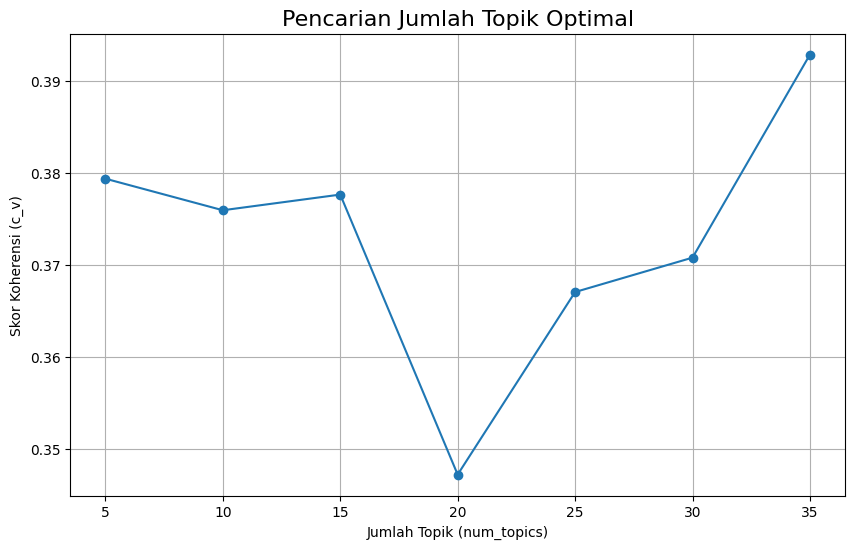


✅ Jumlah topik optimal yang ditemukan: 35

--- Melatih model LDA final dengan topik optimal... ---

--- Topik-topik yang Ditemukan oleh Model LDA ---
Topik: 24
Kata-kata: 0.088*"take" + 0.080*"yes" + 0.067*"way" + 0.065*"ya" + 0.046*"keep" + 0.039*"care" + 0.037*"hello" + 0.027*"name" + 0.022*"make" + 0.021*"u" + 0.021*"nice" + 0.020*"girl" + 0.018*"coz" + 0.018*"book" + 0.017*"must"

Topik: 3
Kata-kata: 0.151*"got" + 0.042*"things" + 0.041*"another" + 0.037*"shes" + 0.029*"bored" + 0.025*"means" + 0.025*"like" + 0.025*"back" + 0.023*"waiting" + 0.022*"online" + 0.020*"chat" + 0.018*"go" + 0.018*"haf" + 0.017*"busy" + 0.016*"congrats"

Topik: 2
Kata-kata: 0.057*"å" + 0.042*"gift" + 0.041*"forgot" + 0.037*"draw" + 0.035*"last" + 0.031*"came" + 0.030*"ur" + 0.029*"wish" + 0.028*"even" + 0.027*"week" + 0.026*"txt" + 0.026*"word" + 0.025*"free" + 0.023*"trip" + 0.023*"ring"

Topik: 6
Kata-kata: 0.137*"call" + 0.065*"prize" + 0.053*"å" + 0.040*"claim" + 0.034*"urgent" + 0.032*"u" + 0.032*"

In [35]:
## EKSTRAKSI FITUR LDA & PENCARIAN TOPIK OPTIMAL

# Siapkan data untuk Gensim
documents = df['tokens'].tolist()
dictionary = Dictionary(documents)
dictionary.filter_extremes(no_below=15, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print(f"\nKamus dibuat dan difilter. Jumlah kata unik: {len(dictionary)}")


# Estimasi Jumlah Topik dengan HDP 
print("\n--- Menjalankan HDP untuk estimasi jumlah topik... ---")
hdp_model = HdpModel(corpus=corpus, id2word=dictionary)
estimated_num_topics = len(hdp_model.print_topics())
print(f"✅ HDP mengestimasi ada sekitar: {estimated_num_topics} topik.")


# Mencari Jumlah Topik Terbaik dengan Plot Koherensi 
def compute_coherence_values_multicore(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    start_time = time.time()
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics,
                             random_state=42, passes=10, workers=3)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        current_coherence = coherencemodel.get_coherence()
        coherence_values.append(current_coherence)
        print(f"Selesai menghitung untuk {num_topics} topik. Skor Koherensi: {current_coherence:.4f}")
    total_time = time.time() - start_time
    print(f"\nTotal waktu pencarian koherensi: {total_time/60:.2f} menit")
    return coherence_values

# Atur rentang pencarian di sekitar hasil HDP
search_start = max(2, estimated_num_topics - 15)
search_limit = estimated_num_topics + 20
search_step = 5

print(f"\n--- Menjalankan pencarian koherensi dari {search_start} hingga {search_limit} topik... ---")
coherence_values = compute_coherence_values_multicore(dictionary=dictionary, corpus=corpus, texts=documents,
                                                    start=search_start, limit=search_limit, step=search_step)

# Tampilkan grafik
x = range(search_start, search_limit, search_step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.title("Pencarian Jumlah Topik Optimal", fontsize=16)
plt.xlabel("Jumlah Topik (num_topics)")
plt.ylabel("Skor Koherensi (c_v)")
plt.xticks(x)
plt.grid(True)
plt.show()

# Pilih jumlah topik terbaik (yang memiliki skor koherensi tertinggi)
optimal_num_topics = x[np.argmax(coherence_values)]
print(f"\n✅ Jumlah topik optimal yang ditemukan: {optimal_num_topics}")


# Latih Model LDA Final & Ekstrak Fitur ---
print("\n--- Melatih model LDA final dengan topik optimal... ---")
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics,
                         random_state=42, passes=15)

print("\n--- Topik-topik yang Ditemukan oleh Model LDA ---")
    # Tampilkan 15 kata teratas untuk setiap topik
for idx, topic in lda_model.print_topics(num_words=15):
    print(f"Topik: {idx}")
    print(f"Kata-kata: {topic}\n")

# Ekstrak fitur (distribusi topik) untuk setiap dokumen
def get_lda_features(lda_model, bow_corpus):
    features = []
    for doc_bow in bow_corpus:
        topic_distribution = lda_model.get_document_topics(doc_bow, minimum_probability=0)
        doc_features = [0.0] * optimal_num_topics
        for topic_id, prob in topic_distribution:
            doc_features[topic_id] = prob
        features.append(doc_features)
    return np.array(features)

X = get_lda_features(lda_model, corpus)

print("Ekstraksi fitur LDA selesai.")
print(f"Bentuk matriks fitur (X): {X.shape}")


--- Mencari K Optimal dengan Silhouette Score (Metode Kuantitatif) ---
Untuk K = 2, Silhouette Score-nya adalah 0.0065
Untuk K = 3, Silhouette Score-nya adalah 0.0180
Untuk K = 4, Silhouette Score-nya adalah 0.0356
Untuk K = 5, Silhouette Score-nya adalah 0.0380
Untuk K = 6, Silhouette Score-nya adalah 0.0565
Untuk K = 7, Silhouette Score-nya adalah 0.0691
Untuk K = 8, Silhouette Score-nya adalah 0.0964
Untuk K = 9, Silhouette Score-nya adalah 0.1151
Untuk K = 10, Silhouette Score-nya adalah 0.1270
Untuk K = 11, Silhouette Score-nya adalah 0.1418
Untuk K = 12, Silhouette Score-nya adalah 0.1494
Untuk K = 13, Silhouette Score-nya adalah 0.1663
Untuk K = 14, Silhouette Score-nya adalah 0.1824
Untuk K = 15, Silhouette Score-nya adalah 0.1935


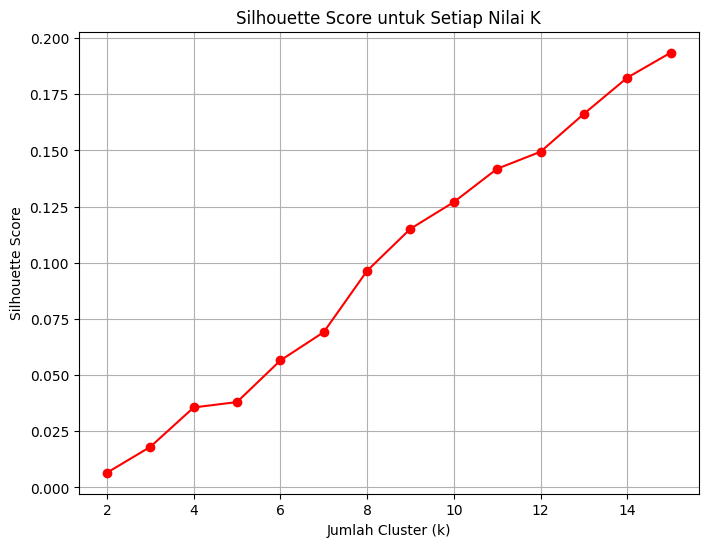


✅ Berdasarkan Silhouette Score, K terbaik adalah: 15

--- Menjalankan K-Means final dengan K=15... ---

Contoh email dari setiap cluster yang ditemukan:

----- CLUSTER 0 -----
- I HAVE A DATE ON SUNDAY WITH WILL!!...
- XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL...

----- CLUSTER 1 -----
- U dun say so early hor... U c already then say......
- Fine if thatåÕs the way u feel. ThatåÕs the way its gota b...

----- CLUSTER 2 -----
- I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today....
- Just forced myself to eat a slice. I'm really not hungry tho. This sucks. Mark is getting worried. He knows I'm sick when I turn down pizza. Lol...

----- CLUSTER 3 -----
- Fair enough, anything going on?...
- Yeah hopefully, if tyler can't do it I could maybe ask around a bit...

----- CLUSTER 4 -----
- Nah I don't think he goes to usf, he li

In [36]:
# Menemukan K Optimal dengan Silhouette Score 
print("\n--- Mencari K Optimal dengan Silhouette Score (Metode Kuantitatif) ---")
K_range = range(2, 16)
silhouette_scores = []
for k in K_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
    score = silhouette_score(X, kmeans_model.labels_)
    silhouette_scores.append(score)
    print(f"Untuk K = {k}, Silhouette Score-nya adalah {score:.4f}")

# Visualisasikan hasilnya
plt.figure(figsize=(8, 6)) # Ukuran plot disesuaikan
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap Nilai K')
plt.grid(True)
plt.show()

# Jalankan K-Means dengan K Terbaik 
# Pilih K yang memberikan Silhouette Score TERTINGGI secara otomatis
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n✅ Berdasarkan Silhouette Score, K terbaik adalah: {optimal_k}")

print(f"\n--- Menjalankan K-Means final dengan K={optimal_k}... ---")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
# Ganti 'df' dengan nama DataFrame yang berisi data bersih Anda
df['cluster'] = kmeans.fit_predict(X)

# Analisis Hasil Cluster ---
print("\nContoh email dari setiap cluster yang ditemukan:")
for i in range(optimal_k):
    print(f"\n----- CLUSTER {i} -----")
    sample_emails = df[df['cluster'] == i]['Text'].head(2).tolist()
    for email_text in sample_emails:
        print(f"- {str(email_text)[:250]}...")

print("\n✅ Proses clustering selesai.")

## Hasil Analisa

- Metodologi: Sama seperti analisis pertama, data email melalui tahap pra-pemrosesan. Fitur diekstraksi menggunakan LDA, di mana ditemukan 35 topik optimal untuk merepresentasikan dataset email. Fitur ini kemudian digunakan sebagai input untuk algoritma clustering K-Means.

- Hasil Clustering: Dengan menggunakan Silhouette Score, jumlah cluster (K) yang paling optimal ditentukan, yaitu 15 cluster. Artinya, K-Means berhasil mengelompokkan 5.572 email ke dalam 15 grup berbeda berdasarkan kesamaan kontennya.

- Kesimpulan: Proses clustering berhasil mengidentifikasi kelompok-kelompok email dengan tema yang berbeda. Meskipun nilai Silhouette Score cenderung rendah, metode ini terbukti mampu menemukan struktur dan pola tersembunyi dalam kumpulan data email tanpa memerlukan label sebelumnya.